<a href="https://colab.research.google.com/github/CoolandHot/colab_tricks/blob/main/Colab_SSH_WebAppOnline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Colab-ssh tunnel
#@markdown Execute this cell to open the ssh tunnel. Check [colab-ssh documentation](https://github.com/WassimBenzarti/colab-ssh) for more details.

# Install colab_ssh on google colab
!pip install colab_ssh --upgrade

from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared
ssh_tunnel_password = "123456" #@param {type: "string"}
launch_ssh_cloudflared(password=ssh_tunnel_password)

# Optional: if you want to clone a Github or Gitlab repository
# repository_url="<PUT_YOUR_REPOSITORY_URL_HERE>" #@param {type: "string"}
# init_git_cloudflared(repository_url)

## Steps to use it on CLI
1. Download the [Cloudflared (Argo Tunnel)](https://developers.cloudflare.com/argo-tunnel/getting-started/installation)
2. open `%USERPROFILE%\.ssh\config` to parse the above codes

in CMD, `ssh treating-plugin-ok-missouri.trycloudflare.com` then input the password

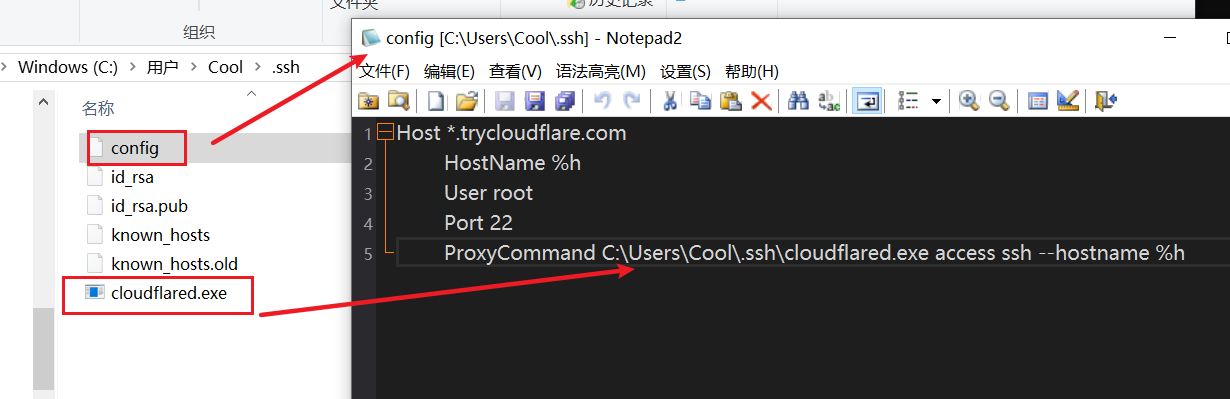

## Steps in VS Code
Download the [Remote - SSH extension](https://marketplace.visualstudio.com/items?itemName=ms-vscode-remote.remote-ssh)

![](https://code.visualstudio.com/assets/learn/develop-cloud/ssh-lab-machines/remote-ssh.png)
Ctrl+Shift+P -> Connect to Host -> input the link `treating-plugin-ok-missouri.trycloudflare.com`

# Running WebApps Online

In [ ]:
import portpicker
port = portpicker.pick_unused_port()

In [ ]:
#@title google.colab.output
from google.colab import output
output.serve_kernel_port_as_window(port)

!python -m http.server {port}

In [ ]:
#@title npx localtunnel
!python -m http.server {port} & npx localtunnel --port {port}

In [ ]:
#@title ngrok
!pip install pyngrok
from pyngrok import ngrok
ngrok.set_auth_token("1oBIW0kh3f69VCswQbJ6p4W0i3Z_2Ui7F4npdBqZWb1jwABZX")
http_tunnel = ngrok.connect(addr=port)
print(http_tunnel)

!python -m http.server {port}